In [1]:
from google.colab import files

upload = files.upload()

Saving data.csv to data.csv


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv("data.csv")
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [4]:
data.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,23920.000000,17465.000000,25011.000000,24966.000000,24330.000000,18335.000000,26452.000000,24674.000000,24526.000000,22964.000000,20635.000000,11239.000000,23894.000000
mean,69.095223,121.578966,17.857667,28.959424,32.737994,23.894052,2.306848,14.758950,34.519763,3.310998,8.918763,3.063745,170.145811
std,65.389862,90.987310,22.585057,24.655411,31.809871,26.087108,7.088831,18.442412,21.763107,16.001572,20.241362,6.356428,142.084468
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,29.937500,59.900000,5.760000,11.982500,12.900000,8.710000,0.520000,5.640000,18.872500,0.150000,0.710000,0.140000,83.000000
50%,50.215000,98.820000,10.080000,22.110000,23.910000,16.170000,0.905000,9.220000,30.835000,1.120000,3.100000,0.980000,121.000000
75%,82.557500,152.970000,20.450000,38.050000,40.807500,30.445000,1.470000,15.560000,45.540000,3.160000,9.360000,3.340000,215.000000
max,949.990000,1000.000000,351.300000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [5]:
data.isnull().sum()

City              0
Date              0
PM2.5          4554
PM10          11009
NO             3463
NO2            3508
NOx            4144
NH3           10139
CO             2022
SO2            3800
O3             3948
Benzene        5510
Toluene        7839
Xylene        17235
AQI            4580
AQI_Bucket     4580
dtype: int64

In [6]:
data.drop(["City"],axis=1,inplace=True)
data.drop(["Date"],axis=1,inplace=True)
data.drop(["NO"],axis=1,inplace=True)
data.drop(["NOx"],axis=1,inplace=True)
data.drop(["Benzene"],axis=1,inplace=True)
data.drop(["Toluene"],axis=1,inplace=True)
data.drop(["Xylene"],axis=1,inplace=True)
data.drop(["AQI_Bucket"],axis=1,inplace=True)

In [7]:
data.head()

,PM2.5,PM10,NO2,NH3,CO,SO2,O3,AQI
0,NaN,NaN,18.22,NaN,0.92,27.64,133.36,NaN
1,NaN,NaN,15.69,NaN,0.97,24.55,34.06,NaN
2,NaN,NaN,19.30,NaN,17.40,29.07,30.70,NaN
3,NaN,NaN,18.48,NaN,1.70,18.59,36.08,NaN
4,NaN,NaN,21.42,NaN,22.10,39.33,39.31,NaN


In [8]:
data.isnull().sum()

PM2.5     4554
PM10     11009
NO2       3508
NH3      10139
CO        2022
SO2       3800
O3        3948
AQI       4580
dtype: int64

In [9]:
data = data[data['AQI'].notna()]

In [10]:
data.isnull().sum()

PM2.5     675
PM10     6994
NO2       359
NH3      6411
CO        442
SO2       588
O3        770
AQI         0
dtype: int64

In [11]:
data = data.fillna(data.mean())

In [12]:
data.isnull().sum()

PM2.5    0
PM10     0
NO2      0
NH3      0
CO       0
SO2      0
O3       0
AQI      0
dtype: int64

In [13]:
data.dtypes


PM2.5    float64
PM10     float64
NO2      float64
NH3      float64
CO       float64
SO2      float64
O3       float64
AQI      float64
dtype: object

In [14]:
from sklearn.utils import shuffle

In [15]:
data = shuffle(data, random_state=0)
data = data.reset_index(drop=True)

In [16]:
y = data["AQI"]
y.head()

0    275.0
1    214.0
2     90.0
3     97.0
4    276.0
Name: AQI, dtype: float64

In [17]:
x = data
x.head()

,PM2.5,PM10,NO2,NH3,CO,SO2,O3,AQI
0,123.46,194.76000,44.28,39.190000,1.22,15.38,28.15,275.0
1,86.62,121.91451,7.69,24.288205,1.10,42.66,47.42,214.0
2,24.22,79.10000,30.02,24.288205,1.36,21.32,39.09,90.0
3,51.28,121.91451,14.26,24.288205,1.15,4.08,17.81,97.0
4,121.12,121.91451,5.85,24.288205,0.81,9.51,36.44,276.0


In [18]:
x.drop(["AQI"],axis=1,inplace=True)

In [19]:
x.head()

,PM2.5,PM10,NO2,NH3,CO,SO2,O3
0,123.46,194.76000,44.28,39.190000,1.22,15.38,28.15
1,86.62,121.91451,7.69,24.288205,1.10,42.66,47.42
2,24.22,79.10000,30.02,24.288205,1.36,21.32,39.09
3,51.28,121.91451,14.26,24.288205,1.15,4.08,17.81
4,121.12,121.91451,5.85,24.288205,0.81,9.51,36.44


In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()
print(scaler.fit(data))

StandardScaler(copy=True, with_mean=True, with_std=True)


In [22]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
model = LinearRegression()

In [25]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
model.score(X_test, y_test) * 100

82.49113023143177

In [27]:
from sklearn.metrics import mean_squared_error


In [31]:
prediction = model.predict(X_test)
prediction

array([293.5223745 , 102.62243659, 155.39674859, ..., 178.42797685,
        71.73745716, 277.47957566])

In [32]:
mse = mean_squared_error(np.asarray(y_test), prediction)
rmse = mse**0.5
print(rmse)

56.0494238391408


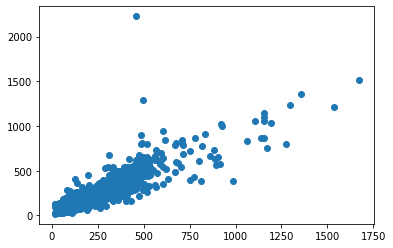

In [33]:
plt.scatter(y_test,prediction)

In [34]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


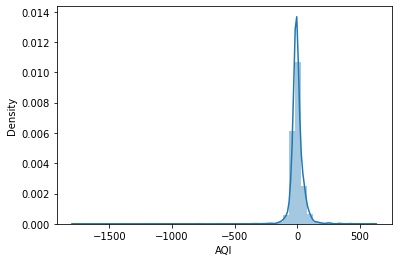

In [35]:
sns.distplot(y_test-prediction)